# Please Don't Use "Smooth Lines"

Microsoft Excel has a handy option when plotting called "smooth lines." Rather than connect data points with straight lines you can smooth those lines. This produces some sort of spline function that connects the data points with a curvy line.

Showing a line on a plot implies that you are plotting a model that is fit to the data. Non one assumes this of standard "connect-the-dots" plots but a curve can confuse the reader, especially when the spline swoops through inpossible values (like negative concentrations).

In this notebook we will plot some data involving living cells. Such data often defies mathematical modelling and all we can do is plot our observations and compare results. I will present this data using MS Excel just for the sake of ridiculing it. Then I will present ways that *Python* can plot similar splines (which you should never use, but at least your exact methods can be documented for others to criticize.)

Finally I will present the data using straight lines, as such data is usually visualized in the literature. As you read widely, you will observe that smooth lines are not used in major journals. 

## The Data

The data set is from a recent coontribution from the group of Sanda Wilkes at the University of Southhampton: "The survival of *Escherichia coli* O157 on a range of metal surfaces." S.A. Wilks, H. Michels, C.W. Keevil, *Int. J. Food Microbiol.*, **2005**, *105*, 445-454. https://doi.org/10.1016/j.ijfoodmicro.2005.04.021.

The experiment involves measuring the density of bacteria in contact with different alloys of copper. This is a process with many factors but the decay of the bacterial population under different condition can be visualized and compared. We begin with Excel.

In [83]:
### Install and load packages
# 
# #!pip install uncertainties              # uncomment to install dependancy

from scipy.optimize import curve_fit     # tool for curve fitting
import scipy                             # includes tools for data analysis
import scipy.stats
import numpy as np                       # import the tools of NumPy but use a shorter name, "np"
from matplotlib import pyplot as plt     # tools for plotting
import pandas as pd

import uncertainties as un               # tool set for handling numbers with uncertainties
from uncertainties import unumpy as unp  # a replacement for numpy that uses uncertainty values

### Set global variables

location_data = "data/"                   ## Use either local folde or github folder. use github locations for Colab
location_styles = "../styles/"
#location_data = "https://raw.githubusercontent.com/blinkletter/StealThisCode/main/data/"
#location_styles = "https://raw.githubusercontent.com/blinkletter/StealThisCode/main/styles/"

### Read in data set
datafile = "7A-bacteriaSurvival.csv"   # change this file for new data

df = pd.read_csv(location_data+datafile, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="TEMP(K)", 
                 comment = "#") 
display(df)

,TIME (MIN),C51000,C71000,C75200,SSteel
0,0,1600000000,1600000000,1.600000e+09,1.600000e+09
1,15,1600000000,1030000000,1.600000e+09,1.600000e+09
2,30,927000000,927000000,9.270000e+08,1.430000e+09
3,45,282000000,670000000,NaN,1.430000e+09
4,60,315000000,540000000,NaN,1.150000e+09
5,75,534000,540000000,NaN,NaN
6,90,12100,540000000,4.850000e+08,1.430000e+09
7,105,1,163000,NaN,NaN
8,120,1,1,NaN,NaN
9,180,1,1,2.040000e+08,1.280000e+09


In [84]:
import scipy.interpolate

df75 = df[["TIME (MIN)","C75200"]].dropna()
dfSS = df[["TIME (MIN)","SSteel"]].dropna()

x = df["TIME (MIN)"]
C51 = df["C51000"]
C71 = df["C71000"]

C75 = df75["C75200"]
x75 = df75["TIME (MIN)"]

SS = dfSS["SSteel"]
xSS = dfSS["TIME (MIN)"]

#C51 = np.log10(C51)
#C71 = np.log10(C71)
#C75 = np.log10(C75)
#SS = np.log10(SS)


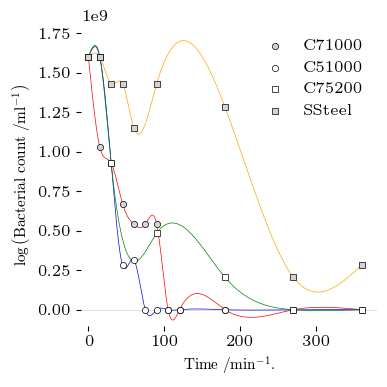

In [94]:

plt.rcdefaults()

style = "tufte.mplstyle"
style_name = location_styles + style
plt.style.use(style_name)

size = [4,4]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size)  
ax.axhline(0, color = "lightgray", linewidth=0.5, zorder = 0)


# Settings for plot
ax.set(
#          title = Title,       
          ylabel=r"$\log\left(\text{Bacterial count}\ /\text{ml}^{-1}\right)$", 
#          yscale = 'log',
          xlabel=r"$\text{Time}\ /\text{min}^{-1}.$",                
          xlim=[-10, 380],                  
          ylim=[-0.1E9,1.8E9]
         # yticks = [0,2,4,6,8,10]
       )

#ax.scatter(x, C71, marker = "o", s = 40, color = "white", zorder = 1)
ax.scatter(x, C71, marker = "o", s = 20, 
              facecolor = "lightgray", edgecolors = "black", 
              linewidths=0.5, zorder = 4, label = "C71000") 
#ax.plot(x,C71, marker = None, color = "red", linewidth=0.5, zorder = 0)

#ax.scatter(x, C51, marker = "o", s = 40, color = "white", zorder = 1)
ax.scatter(x, C51, marker = "o", s = 20, 
              facecolor = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4, label = "C51000") 
#ax.plot(x,C51, marker = None, color = "blue", linewidth=0.5, zorder = 0)

#ax.scatter(x75, C75, marker = "s", s = 40, color = "white", zorder = 1)
ax.scatter(x75, C75, marker = "s", s = 20, 
              facecolor = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4, label = "C75200") 
#ax.plot(x75,C75, marker = None, color = "red", linewidth=0.5, zorder = 0)

#ax.scatter(xSS, SS, marker = "s", s = 40, color = "white", zorder = 1)
ax.scatter(xSS, SS, marker = "s", s = 20, 
              facecolor = "lightgray", edgecolors = "black", 
              linewidths=0.5, zorder = 4, label = "SSteel") 
#ax.plot(xSS,SS, marker = None, color = "red", linewidth=0.5, zorder = 0)
ax.legend(loc="upper right")


xs = np.arange(0, 360, 0.1)

spline = scipy.interpolate.CubicSpline(x, C71, bc_type="natural")
#spline = scipy.interpolate.Akima1DInterpolator(x, C71, 
#                                               #method="akima" # Requires version 1.13 of SciPy
#                                               )
#spline = scipy.interpolate.Akima1DInterpolator(x, C71, 
#                                                #method="makima" # Requires version 1.13 of SciPy
#                                                )
ax.plot(xs, spline(xs), marker = None, color = "red", linewidth=0.5, zorder = 0, label = "C71000")

spline = scipy.interpolate.CubicSpline(x, C51, bc_type="natural")
#spline = scipy.interpolate.Akima1DInterpolator(x, C51, 
#                                               #method="akima"  # Requires version 1.13 of SciPy
#                                               )  
#spline = scipy.interpolate.Akima1DInterpolator(x, C51, 
#                                               #method="makima" # Requires version 1.13 of SciPy
#                                               )
ax.plot(xs, spline(xs), marker = None, color = "blue", linewidth=0.5, zorder = 0, label = "C51000")

spline = scipy.interpolate.CubicSpline(x75, C75, bc_type="natural")
#spline = scipy.interpolate.PchipInterpolator(x75, C75)  
#spline = scipy.interpolate.Akima1DInterpolator(x75, C75, 
#                                               #method="akima"  # Requires version 1.13 of SciPy
#                                               ) 
#spline = scipy.interpolate.Akima1DInterpolator(x75, C75, 
#                                               #method="makima" # Requires version 1.13 of SciPy
#                                               )
ax.plot(xs, spline(xs), marker = None, color = "green", linewidth=0.5, zorder = 0, label = "C75200")

spline = scipy.interpolate.CubicSpline(xSS, SS, bc_type="natural")
#spline = scipy.interpolate.PchipInterpolator(xSS, SS)  
#spline = scipy.interpolate.Akima1DInterpolator(xSS, SS, 
#                                               #method="akima"  # Requires version 1.13 of SciPy
#                                               ) 
#spline = scipy.interpolate.Akima1DInterpolator(xSS, SS, 
#                                               #method="makima" # Requires version 1.13 of SciPy
#                                               )
ax.plot(xs, spline(xs), marker = None, color = "orange", linewidth=0.5, zorder = 0, label = "SSteel")

#ax.legend(loc="upper right")

plt.savefig("plots/6A1.pdf")
plt.show()

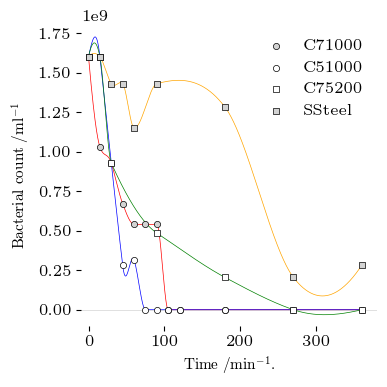

In [86]:

plt.rcdefaults()

style = "tufte.mplstyle"
style_name = location_styles + style
plt.style.use(style_name)

size = [4,4]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size)  
ax.axhline(0, color = "lightgray", linewidth=0.5, zorder = 0)


# Settings for plot
ax.set(
#          title = Title,       
          ylabel=r"$\text{Bacterial count}\ /\text{ml}^{-1}$", 
#          yscale = 'log',
          xlabel=r"$\text{Time}\ /\text{min}^{-1}.$",                
          xlim=[-10, 380],                  
          ylim=[-0.1E9,1.8E9]
       )

#ax.scatter(x, C71, marker = "o", s = 40, color = "white", zorder = 1)
ax.scatter(x, C71, marker = "o", s = 20, 
              facecolor = "lightgray", edgecolors = "black", 
              linewidths=0.5, zorder = 4, label = "C71000") 
#ax.plot(x,C71, marker = None, color = "red", linewidth=0.5, zorder = 0)

#ax.scatter(x, C51, marker = "o", s = 40, color = "white", zorder = 1)
ax.scatter(x, C51, marker = "o", s = 20, 
              facecolor = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4, label = "C51000") 
#ax.plot(x,C51, marker = None, color = "blue", linewidth=0.5, zorder = 0)

#ax.scatter(x75, C75, marker = "s", s = 40, color = "white", zorder = 1)
ax.scatter(x75, C75, marker = "s", s = 20, 
              facecolor = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4, label = "C75200") 
#ax.plot(x75,C75, marker = None, color = "green", linewidth=0.5, zorder = 0)

#ax.scatter(xSS, SS, marker = "s", s = 40, color = "white", zorder = 1)
ax.scatter(xSS, SS, marker = "s", s = 20, 
              facecolor = "lightgray", edgecolors = "black", 
              linewidths=0.5, zorder = 4, label = "SSteel") 
#ax.plot(xSS,SS, marker = None, color = "orange", linewidth=0.5, zorder = 0)


xs = np.arange(0, 360, 0.1)

spline = scipy.interpolate.Akima1DInterpolator(x, C71, 
                                               #method="akima" # Requires version 1.13 of SciPy
                                               )
#spline = scipy.interpolate.Akima1DInterpolator(x, C71, 
#                                                #method="makima" # Requires version 1.13 of SciPy
#                                                )
ax.plot(xs, spline(xs), marker = None, color = "red", linewidth=0.5, zorder = 0)

spline = scipy.interpolate.Akima1DInterpolator(x, C51, 
                                               #method="akima"  # Requires version 1.13 of SciPy
                                               )  
#spline = scipy.interpolate.Akima1DInterpolator(x, C51, 
#                                               #method="makima" # Requires version 1.13 of SciPy
#                                               )
ax.plot(xs, spline(xs), marker = None, color = "blue", linewidth=0.5, zorder = 0)

#spline = scipy.interpolate.PchipInterpolator(x75, C75)  
spline = scipy.interpolate.Akima1DInterpolator(x75, C75, 
                                               #method="akima"  # Requires version 1.13 of SciPy
                                               ) 
#spline = scipy.interpolate.Akima1DInterpolator(x75, C75, 
#                                               #method="makima" # Requires version 1.13 of SciPy
#                                               )
ax.plot(xs, spline(xs), marker = None, color = "green", linewidth=0.5, zorder = 0)

#spline = scipy.interpolate.PchipInterpolator(xSS, SS)  
spline = scipy.interpolate.Akima1DInterpolator(xSS, SS, 
                                               #method="akima"  # Requires version 1.13 of SciPy
                                               ) 
#spline = scipy.interpolate.Akima1DInterpolator(xSS, SS, 
#                                               #method="makima" # Requires version 1.13 of SciPy
#                                               )
ax.plot(xs, spline(xs), marker = None, color = "orange", linewidth=0.5, zorder = 0)

ax.legend(loc="upper right")

plt.savefig("plots/6A2.pdf")
plt.show()

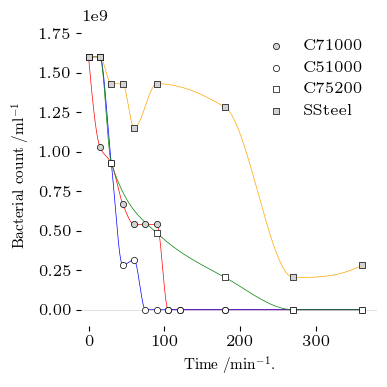

In [87]:

plt.rcdefaults()

style = "tufte.mplstyle"
style_name = location_styles + style
plt.style.use(style_name)

size = [4,4]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size)  
ax.axhline(0, color = "lightgray", linewidth=0.5, zorder = 0)


# Settings for plot
ax.set(
#          title = Title,       
          ylabel=r"$\text{Bacterial count}\ /\text{ml}^{-1}$", 
#          yscale = 'log',
          xlabel=r"$\text{Time}\ /\text{min}^{-1}.$",                
          xlim=[-10, 380],                  
          ylim=[-0.1E9,1.8E9]
       )
#ax.scatter(x, C71, marker = "o", s = 40, color = "white", zorder = 1)
ax.scatter(x, C71, marker = "o", s = 20, 
              facecolor = "lightgray", edgecolors = "black", 
              linewidths=0.5, zorder = 4, label = "C71000") 
#ax.plot(x,C71, marker = None, color = "red", linewidth=0.5, zorder = 0)

#ax.scatter(x, C51, marker = "o", s = 40, color = "white", zorder = 1)
ax.scatter(x, C51, marker = "o", s = 20, 
              facecolor = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4, label = "C51000") 
#ax.plot(x,C51, marker = None, color = "blue", linewidth=0.5, zorder = 0)

#ax.scatter(x75, C75, marker = "s", s = 40, color = "white", zorder = 1)
ax.scatter(x75, C75, marker = "s", s = 20, 
              facecolor = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4, label = "C75200") 
#ax.plot(x75,C75, marker = None, color = "green", linewidth=0.5, zorder = 0)

#ax.scatter(xSS, SS, marker = "s", s = 40, color = "white", zorder = 1)
ax.scatter(xSS, SS, marker = "s", s = 20, 
              facecolor = "lightgray", edgecolors = "black", 
              linewidths=0.5, zorder = 4, label = "SSteel") 
#ax.plot(xSS,SS, marker = None, color = "orange", linewidth=0.5, zorder = 0)


xs = np.arange(0, 360, 0.1)

spline = scipy.interpolate.PchipInterpolator(x, C71)  
#spline = scipy.interpolate.Akima1DInterpolator(x, C71, 
#                                               #method="akima" # Requires version 1.13 of SciPy
#                                               )
#spline = scipy.interpolate.Akima1DInterpolator(x, C71, 
#                                                #method="makima" # Requires version 1.13 of SciPy
#                                                )
ax.plot(xs, spline(xs), marker = None, color = "red", linewidth=0.5, zorder = 0)

spline = scipy.interpolate.PchipInterpolator(x, C51)  
#spline = scipy.interpolate.Akima1DInterpolator(x, C51, 
#                                               #method="akima"  # Requires version 1.13 of SciPy
#                                               )  
#spline = scipy.interpolate.Akima1DInterpolator(x, C51, 
#                                               #method="makima" # Requires version 1.13 of SciPy
#                                               )
ax.plot(xs, spline(xs), marker = None, color = "blue", linewidth=0.5, zorder = 0)

spline = scipy.interpolate.PchipInterpolator(x75, C75)  
#spline = scipy.interpolate.Akima1DInterpolator(x75, C75, 
#                                               #method="akima"  # Requires version 1.13 of SciPy
#                                               ) 
#spline = scipy.interpolate.Akima1DInterpolator(x75, C75, 
#                                               #method="makima" # Requires version 1.13 of SciPy
#                                               )
ax.plot(xs, spline(xs), marker = None, color = "green", linewidth=0.5, zorder = 0)

spline = scipy.interpolate.PchipInterpolator(xSS, SS)  
#spline = scipy.interpolate.Akima1DInterpolator(xSS, SS, 
#                                               #method="akima"  # Requires version 1.13 of SciPy
#                                               ) 
#spline = scipy.interpolate.Akima1DInterpolator(xSS, SS, 
#                                               #method="makima" # Requires version 1.13 of SciPy
#                                               )
ax.plot(xs, spline(xs), marker = None, color = "orange", linewidth=0.5, zorder = 0)

ax.legend(loc="upper right")

plt.savefig("plots/6A3.pdf")
plt.show()

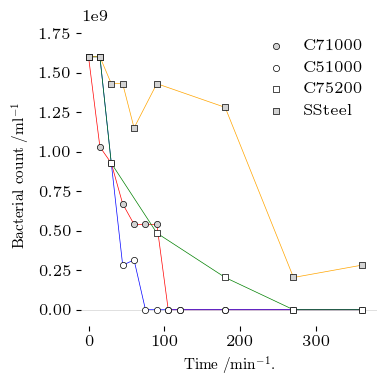

In [88]:

plt.rcdefaults()

style = "tufte.mplstyle"
style_name = location_styles + style
plt.style.use(style_name)

size = [4,4]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size)  
ax.axhline(0, color = "lightgray", linewidth=0.5, zorder = 0)


# Settings for plot
ax.set(
#          title = Title,       
          ylabel=r"$\text{Bacterial count}\ /\text{ml}^{-1}$", 
#          yscale = 'log',
          xlabel=r"$\text{Time}\ /\text{min}^{-1}.$",                
          xlim=[-10, 380],                  
          ylim=[-0.1E9,1.8E9]
       )
#ax.scatter(x, C71, marker = "o", s = 40, color = "white", zorder = 1)
ax.scatter(x, C71, marker = "o", s = 20, 
              facecolor = "lightgray", edgecolors = "black", 
              linewidths=0.5, zorder = 4, label = "C71000") 
ax.plot(x,C71, marker = None, color = "red", linewidth=0.5, zorder = 0)

#ax.scatter(x, C51, marker = "o", s = 40, color = "white", zorder = 1)
ax.scatter(x, C51, marker = "o", s = 20, 
              facecolor = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4, label = "C51000") 
ax.plot(x,C51, marker = None, color = "blue", linewidth=0.5, zorder = 0)

#ax.scatter(x75, C75, marker = "s", s = 40, color = "white", zorder = 1)
ax.scatter(x75, C75, marker = "s", s = 20, 
              facecolor = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4, label = "C75200") 
ax.plot(x75,C75, marker = None, color = "green", linewidth=0.5, zorder = 0)

#ax.scatter(xSS, SS, marker = "s", s = 40, color = "white", zorder = 1)
ax.scatter(xSS, SS, marker = "s", s = 20, 
              facecolor = "lightgray", edgecolors = "black", 
              linewidths=0.5, zorder = 4, label = "SSteel") 
ax.plot(xSS,SS, marker = None, color = "orange", linewidth=0.5, zorder = 0)


xs = np.arange(0, 360, 0.1)


ax.legend(loc="upper right")

plt.savefig("plots/6A4.pdf")
plt.show()

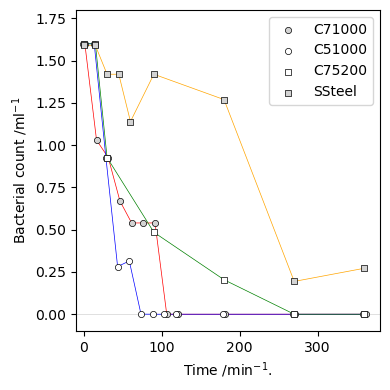

In [89]:

plt.rcdefaults()

style = "tufte.mplstyle"
style = "science.mplstyle"
style_name = location_styles + style
#plt.style.use(style_name)

size = [4,4]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size)  
ax.axhline(0, color = "lightgray", linewidth=0.5, zorder = 0)


# Settings for plot
ax.set(
#          title = Title,       
          ylabel=r"$\text{Bacterial count}\ /\text{ml}^{-1}$", 
#          yscale = 'log',
          xlabel=r"$\text{Time}\ /\text{min}^{-1}.$",                
          xlim=[-10, 380],                  
          ylim=[-0.1,1.8]
       )
x0 = np.array(x.copy())    ### copy x so we dont loose it

y = C71 / 1E9
x = x0 + 1.5
ax.scatter(x, y, marker = "o", s = 20, 
              facecolor = "lightgray", edgecolors = "black", 
              linewidths=0.5, zorder = 4, label = "C71000") 
ax.plot(x,y, marker = None, color = "red", linewidth=0.5, zorder = 0)

y = C51 / 1E9
x = x0 - 1.5
#ax.scatter(x, y, marker = "o", s = 40, color = "white", zorder = 1)
ax.scatter(x, y, marker = "o", s = 20, 
              facecolor = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4, label = "C51000") 
ax.plot(x,y, marker = None, color = "blue", linewidth=0.5, zorder = 0)

y = C75 / 1E9
x = x75 - 1.5
#ax.scatter(x75, y, marker = "s", s = 40, color = "white", zorder = 1)
ax.scatter(x75, y, marker = "s", s = 20, 
              facecolor = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4, label = "C75200") 
ax.plot(x75,y, marker = None, color = "green", linewidth=0.5, zorder = 0)

y = (SS - 1E7)  / 1E9
x = xSS + 1.5
#ax.scatter(xSS, y, marker = "s", s = 40, color = "white", zorder = 1)
ax.scatter(xSS, y, marker = "s", s = 20, 
              facecolor = "lightgray", edgecolors = "black", 
              linewidths=0.5, zorder = 4, label = "SSteel") 
ax.plot(xSS,y, marker = None, color = "orange", linewidth=0.5, zorder = 0)


xs = np.arange(0, 360, 0.1)


ax.legend(loc="upper right")
plt.tight_layout()
plt.savefig("plots/6A5.pdf")
plt.show()

x = x0    ### restore x to its original state

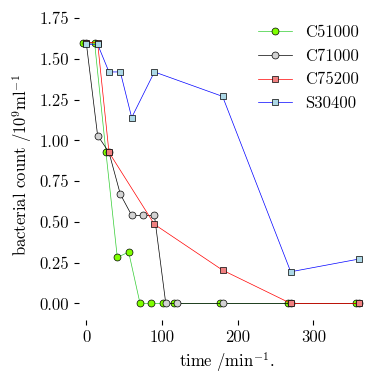

In [103]:

plt.rcdefaults()

style = "tufte2.mplstyle"
#style = "matplotlibrctufte.mplstyle"
#style = "science.mplstyle"

#style_name = 'fivethirtyeight'
#plt.style.use(style_name)

style_name = location_styles + style
plt.style.use(style_name)

size = [4,4]
fig, ax = plt.subplots(nrows=1, ncols=1)  
#ax.axhline(0, color = "lightgray", linewidth=0.5, zorder = 0)


# Settings for plot
ax.set(
#          title = Title,       
          ylabel=r"$\text{bacterial count}\ / 10^9 \text{ml}^{-1}$", 
#          yscale = 'log',
          xlabel=r"$\text{time}\ /\text{min}^{-1}.$",                
          xlim=[-10, 380],                  
          ylim=[-0.1,1.8]
       )
x0 = np.array(x.copy())    ### copy x so we dont loose it

y = C51 / 1E9
x = x0 - 2
ax.plot(x, y, marker = "o", markersize = 5, 
              color = "limegreen", markerfacecolor = "chartreuse", markeredgecolor = "black", 
              linewidth=0.5, markeredgewidth = 0.5, zorder = 4, label = "C51000") 

y = C71 / 1E9
x = x0 + 2
ax.plot(x, y, marker = "o", markersize = 5, 
              color = "black", markerfacecolor = "lightgray", markeredgecolor = "black", 
              linewidth=0.5, markeredgewidth = 0.5, zorder = 4, label = "C71000") 

y = C75 / 1E9
x = x75 + 0
ax.plot(x, y, marker = "s", markersize = 5, 
              color = "red", markerfacecolor = "lightcoral", markeredgecolor = "black", 
              linewidth=0.5, markeredgewidth = 0.5, zorder = 4, label = "C75200") 

y = (SS - 1E7)  / 1E9
x = xSS - 0
ax.plot(x, y, marker = "s", markersize = 5, 
              color = "blue", markerfacecolor = "lightblue", markeredgecolor = "black", 
              linewidth=0.5, markeredgewidth = 0.5, zorder = 4, label = "S30400") 


xs = np.arange(0, 360, 0.1)


ax.legend(loc="upper right")
plt.tight_layout()
plt.savefig("plots/6A5.pdf")
plt.show()

x = x0    ### restore x to its original state

In [91]:
import matplotlib.style

matplotlib.style.available

import matplotlib
matplotlib.__version__

'3.8.4'

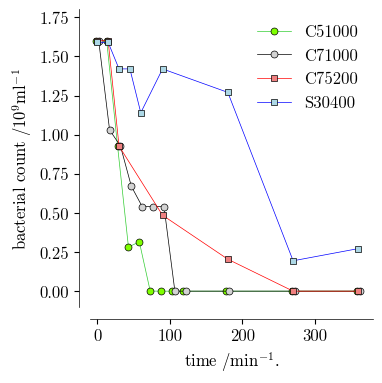

In [92]:
#!python -m pip install "matplotlib_tufte @ git+https://github.com/ninivert/matplotlib_tufte.git"
# see https://github.com/ninivert/matplotlib_tufte/tree/master for documentaion
plt.rcdefaults()

from matplotlib_tufte import *
setup()


style = "tufte2.mplstyle"
#style = "matplotlibrctufte.mplstyle"
#style = "science.mplstyle"

#style_name = 'fivethirtyeight'
#plt.style.use(style_name)

style_name = location_styles + style
plt.style.use(style_name)

size = [4,4]
fig, ax = plt.subplots(nrows=1, ncols=1)  
#ax.axhline(0, color = "lightgray", linewidth=0.5, zorder = 0)


# Settings for plot
ax.set(
#          title = Title,       
          ylabel=r"$\text{bacterial count}\ / 10^9 \text{ml}^{-1}$", 
#          yscale = 'log',
          xlabel=r"$\text{time}\ /\text{min}^{-1}.$",                
          xlim=[-10, 380],                  
          ylim=[-0.1,1.8]
       )
x0 = np.array(x.copy())    ### copy x so we dont loose it

y = C51 / 1E9
x = x0 - 2
ax.plot(x, y, marker = "o", ms = 5, 
              color = "limegreen", markerfacecolor = "chartreuse", markeredgecolor = "black", 
              linewidth=0.5, markeredgewidth = 0.5, zorder = 4, label = "C51000") 

y = C71 / 1E9
x = x0 + 2
ax.plot(x, y, marker = "o", ms = 5, 
              color = "black", markerfacecolor = "lightgray", markeredgecolor = "black", 
              linewidth=0.5, markeredgewidth = 0.5, zorder = 4, label = "C71000") 

y = C75 / 1E9
x = x75 + 0
ax.plot(x, y, marker = "s", ms = 5, 
              color = "red", markerfacecolor = "lightcoral", markeredgecolor = "black", 
              linewidth=0.5, markeredgewidth = 0.5, zorder = 4, label = "C75200") 

y = (SS - 1E7)  / 1E9
x = xSS - 0
ax.plot(x, y, marker = "s", ms = 5, 
              color = "blue", markerfacecolor = "lightblue", markeredgecolor = "black", 
              linewidth=0.5, markeredgewidth = 0.5, zorder = 4, label = "S30400") 


xs = np.arange(0, 360, 0.1)
breathe(ax)

ax.legend(loc="upper right")
plt.tight_layout()
plt.savefig("plots/6A5.pdf")
plt.show()

x = x0    ### restore x to its original state



In [93]:
from matplotlib_tufte import *
setup()
import matplotlib_tufte
help(matplotlib_tufte.despine)

Help on function despine in module matplotlib_tufte:

despine(ax: matplotlib.axes._axes.Axes | None = None, which=<AxisWhich.BOTH: 'both'>)
    Remove the top and right spine
    
    Parameters
    ----------
    ax : matplotlib.axes.Axes or None
            axes to use, if set to ``None`` then ``plt.gca()`` is used
    which : str or AxisWhich, optional
            which axis to despine, by default AxisWhich.BOTH

